In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

import tensorflow 
from tensorflow.keras.layers import Input, Dense, Conv2D, GlobalMaxPooling2D,MaxPooling2D, UpSampling2D,Flatten,Reshape,BatchNormalization,Dropout,LeakyReLU,ReLU
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import tensorflow.keras
from tensorflow.keras.models import load_model
from tensorflow.keras.activations import selu
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_mean_squared_error', patience=5)
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
from matplotlib import  pylab as plt
from astropy.visualization import (ZScaleInterval, ImageNormalize)
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras import backend
#backend.set_image_data_format('channels_first')
print('Done!')

Done!


In [2]:
from IPython.display import clear_output
class PlotLosses(tensorflow.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('accuracy'))
        self.val_losses.append(logs.get('val_accuracy'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="train")
        plt.plot(self.x, self.val_losses, label="validation",linestyle='--')
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

print('Done!')

Done!


In [3]:


def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

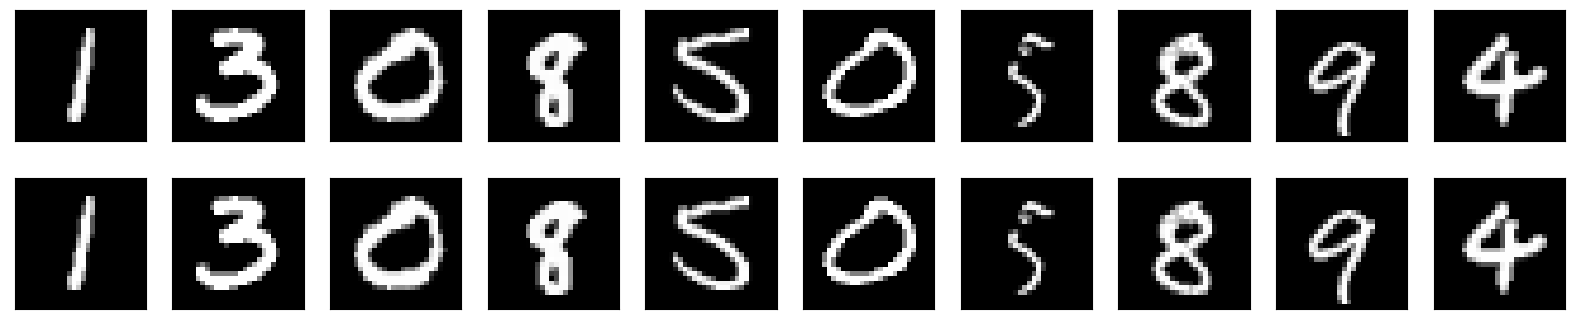

In [4]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(inp_tr, tar_tr), (inp_va, tar_va) = mnist.load_data()

# Normalize and reshape the data
inp_tr = preprocess(inp_tr)
inp_va = preprocess(inp_va)

# Create a copy of the data with added noise
noisy_inp_tr = noise(inp_tr)
noisy_inp_va = noise(inp_va)

# Display the train data and a version of it with added noise
display(inp_tr, noisy_inp_tr)

In [5]:
num_classes = 10
tar_tr_cat = tensorflow.keras.utils.to_categorical(tar_tr, num_classes)
tar_va_cat = tensorflow.keras.utils.to_categorical(tar_va, num_classes)

In [6]:
print(tar_tr)

[5 0 4 ... 5 6 8]


In [7]:
print(tar_tr_cat)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [8]:
class_input = layers.Input(shape=(28, 28, 1))

# Encoder
X = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(class_input)
X = layers.MaxPooling2D((2, 2), padding="same")(X)

X = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(X)
X = layers.MaxPooling2D((2, 2), padding="same")(X)

X = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(X)
X= layers.MaxPooling2D((2, 2), padding="same")(X)


#x=BatchNormalization()(x)
flat = Flatten(name = 'flat')(X)



x=Dense(500,activation='relu')(flat)
x = Dropout(0.25)(x)

x=Dense(100,activation='relu')(x)
#x=BatchNormalization()(x)
x = Dropout(0.25)(x)


class_output=Dense(10,activation='softmax')(x)

# Autoencoder
classifer = Model(class_input, class_output)
classifer.compile(optimizer="adam", loss='categorical_crossentropy',metrics='acuracy')
classifer.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248  

In [9]:
early_stopping = EarlyStopping(monitor='accuracy', patience=4)

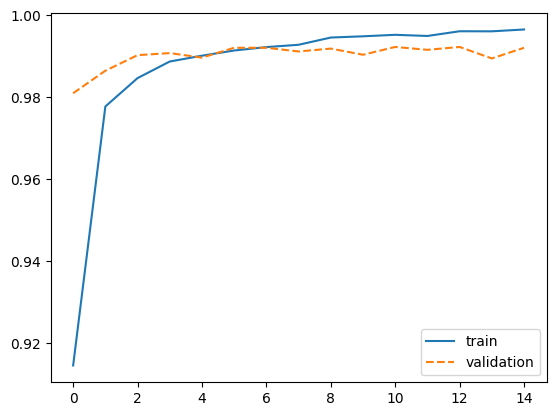

469/469 [==============================] - 2s 4ms/step - loss: 0.0117 - accuracy: 0.9965 - val_loss: 0.0308 - val_accuracy: 0.9920


In [10]:
batch_size = 128
epochs = 15

classifer.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

classifer.fit(noisy_inp_tr, tar_tr_cat, batch_size=batch_size, epochs=epochs, 
              validation_data=(noisy_inp_va,tar_va_cat),callbacks=[plot_losses,early_stopping])

In [11]:
predictions = classifer.predict(noisy_inp_va)


313/313 [==============================] - 0s 1ms/step


In [16]:
predictions[0]

array([4.1131097e-14, 4.8452542e-10, 5.9878857e-10, 5.2050125e-11,
       1.2038028e-08, 3.6401459e-13, 1.2138339e-13, 1.0000000e+00,
       3.5364927e-12, 1.3972617e-08], dtype=float32)

In [12]:
# Today save the model
from tensorflow.keras.models import save_model
save_model(classifer, "classifer.h5")

# Tomorrow load the model and use it

# load model
loaded_classifer = load_model('classifer.h5')
# print summary
loaded_classifer.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248  

# Use relevant metrics to evluate the performance of the model (Recall, confusion matrix, ....)